## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.75, 0.8, 0.85, 0.9, 0.95]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mmt in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Momentum = %.6f" % (mmt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mmt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # 訓練的結果
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    momentum_tag = "momentum-%s" % str(mmt)
    
    # 將結果用 dictionary 紀錄
    results[momentum_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Momentum = 0.750000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 44us/step - loss: 0.7804 - accuracy: 0.7290 - val_loss: 1.4647 - val_accuracy: 0.5344
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.7640 - accuracy: 0.7347 - val_loss: 1.4530 - val_accuracy: 0.5214
Momentum = 0.800000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)     

50000/50000 [==============================] - 2s 43us/step - loss: 0.7076 - accuracy: 0.7517 - val_loss: 1.5121 - val_accuracy: 0.5373
Epoch 48/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.6966 - accuracy: 0.7563 - val_loss: 1.4584 - val_accuracy: 0.5322
Epoch 49/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.6820 - accuracy: 0.7604 - val_loss: 1.5453 - val_accuracy: 0.5276
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.6671 - accuracy: 0.7653 - val_loss: 1.7074 - val_accuracy: 0.5106
Momentum = 0.850000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____________________________________________________

50000/50000 [==============================] - 2s 43us/step - loss: 0.6276 - accuracy: 0.7786 - val_loss: 1.6413 - val_accuracy: 0.5236
Epoch 46/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.6030 - accuracy: 0.7895 - val_loss: 1.7532 - val_accuracy: 0.5158
Epoch 47/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5889 - accuracy: 0.7938 - val_loss: 1.7323 - val_accuracy: 0.5189
Epoch 48/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5720 - accuracy: 0.7997 - val_loss: 1.6778 - val_accuracy: 0.5192
Epoch 49/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5581 - accuracy: 0.8050 - val_loss: 1.6988 - val_accuracy: 0.5211
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5500 - accuracy: 0.8078 - val_loss: 1.8470 - val_accuracy: 0.5149
Momentum = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)         

50000/50000 [==============================] - 2s 43us/step - loss: 0.5423 - accuracy: 0.8088 - val_loss: 1.7744 - val_accuracy: 0.5208
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5203 - accuracy: 0.8154 - val_loss: 1.7777 - val_accuracy: 0.5323
Epoch 45/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5040 - accuracy: 0.8207 - val_loss: 1.9776 - val_accuracy: 0.5174
Epoch 46/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.4850 - accuracy: 0.8270 - val_loss: 1.9055 - val_accuracy: 0.5243
Epoch 47/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.4663 - accuracy: 0.8358 - val_loss: 1.9958 - val_accuracy: 0.5123
Epoch 48/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.4548 - accuracy: 0.8394 - val_loss: 2.0094 - val_accuracy: 0.5198
Epoch 49/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.4422 - accuracy: 0.8440 - val_loss: 1.9498

50000/50000 [==============================] - 2s 44us/step - loss: 0.5037 - accuracy: 0.8199 - val_loss: 1.9089 - val_accuracy: 0.5140
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.4942 - accuracy: 0.8215 - val_loss: 1.9217 - val_accuracy: 0.5280
Epoch 43/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4856 - accuracy: 0.8266 - val_loss: 1.9476 - val_accuracy: 0.5251
Epoch 44/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4572 - accuracy: 0.8371 - val_loss: 1.9989 - val_accuracy: 0.5230
Epoch 45/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4538 - accuracy: 0.8354 - val_loss: 2.0947 - val_accuracy: 0.5270
Epoch 46/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4218 - accuracy: 0.8485 - val_loss: 2.0817 - val_accuracy: 0.5172
Epoch 47/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4219 - accuracy: 0.8502 - val_loss: 2.2036

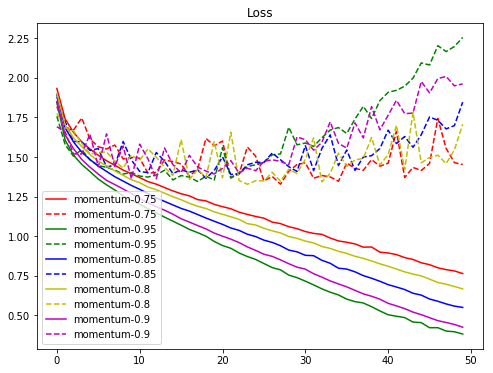

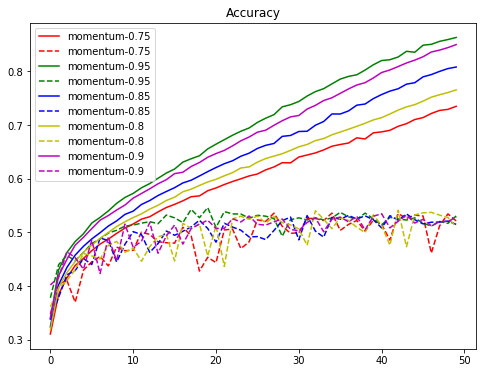

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    # results['exp-lr-0.1']
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()